## - 대전광역시 구별 그래프 그리기

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

data = pd.read_excel('data/2023연령별인구.xlsx')
deajeon_data = data[data['행정기관'].str.contains('대전광역시')]
deajeon_data

,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
1112,대전광역시,1444595,1444595,98036,138687,201004,188003,222353,241204,201595,...,67048,95796,88764,111322,120923,103878,52992,30304,5281,177
1113,대전광역시 동구,218687,218687,12446,19079,29086,24144,31588,36033,35193,...,9271,13676,11017,15114,17374,18023,10821,6269,979,31
1114,대전광역시 동구 중앙동,3888,3888,82,98,227,301,385,681,1033,...,49,93,130,122,220,436,340,223,37,1
1115,대전광역시 동구 효동,23044,23044,1814,3219,2293,2180,4435,3698,2972,...,1561,1066,1078,2301,1831,1616,896,434,77,3
1116,대전광역시 동구 신인동,15315,15315,1299,1094,1414,2452,2236,2334,2320,...,484,705,1200,1054,1229,1273,778,401,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,대전광역시 대덕구 석봉동,16257,16257,1739,1617,1735,2616,2767,2612,1999,...,776,775,1287,1272,1336,990,370,258,43,1
1196,대전광역시 대덕구 덕암동,13127,13127,573,956,1908,1647,1780,2563,2013,...,458,805,630,814,1159,977,542,363,64,3
1197,대전광역시 대덕구 목상동,6176,6176,323,522,886,936,1023,1137,828,...,272,397,332,442,506,413,177,112,16,3
1198,대전광역시 대덕구 법1동,12556,12556,785,957,1378,1542,1567,2368,2202,...,478,647,749,777,1317,1169,679,387,72,4


In [24]:
deajeon_data_gu = deajeon_data[
    deajeon_data['행정기관'].str.split().str[2].isnull() &
    deajeon_data['행정기관'].str.split().str[1].notnull()
]
deajeon_data_gu

,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
1113,대전광역시 동구,218687,218687,12446,19079,29086,24144,31588,36033,35193,...,9271,13676,11017,15114,17374,18023,10821,6269,979,31
1130,대전광역시 중구,224439,224439,12173,19936,27841,24107,32792,38419,35416,...,9714,13713,11600,16281,18939,18442,11685,6733,1091,35
1148,대전광역시 서구,466927,466927,32046,46717,69046,63542,73281,76579,61760,...,22671,34138,30791,37645,39512,32318,15351,8301,1528,45
1173,대전광역시 유성구,364062,364062,32175,38352,53317,56767,60658,57397,40986,...,18433,24444,26775,30697,28915,20821,8154,4767,1009,33
1187,대전광역시 대덕구,170480,170480,9196,14603,21714,19443,24034,32776,28240,...,6959,9825,8581,11585,16183,14274,6981,4234,674,33


# 어쩌다 데이터 분석 with 파이썬
## 7.1.3 범주형 데이터 개수 확인: 막대그래프(332p)

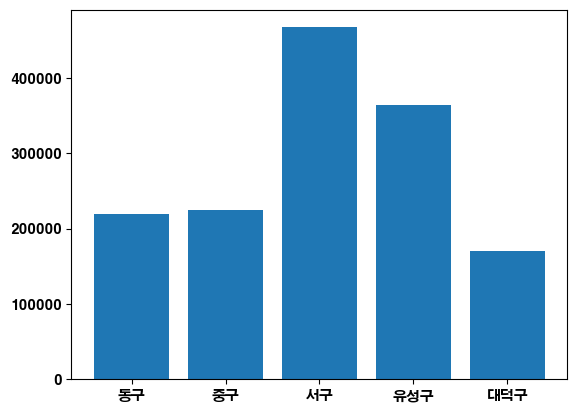

In [89]:
plt.bar(deajeon_data_gu['행정기관'].str.split().str[1], deajeon_data_gu['총 인구수'])
plt.show()

## -구별 연령대 별로 그래프 그리기

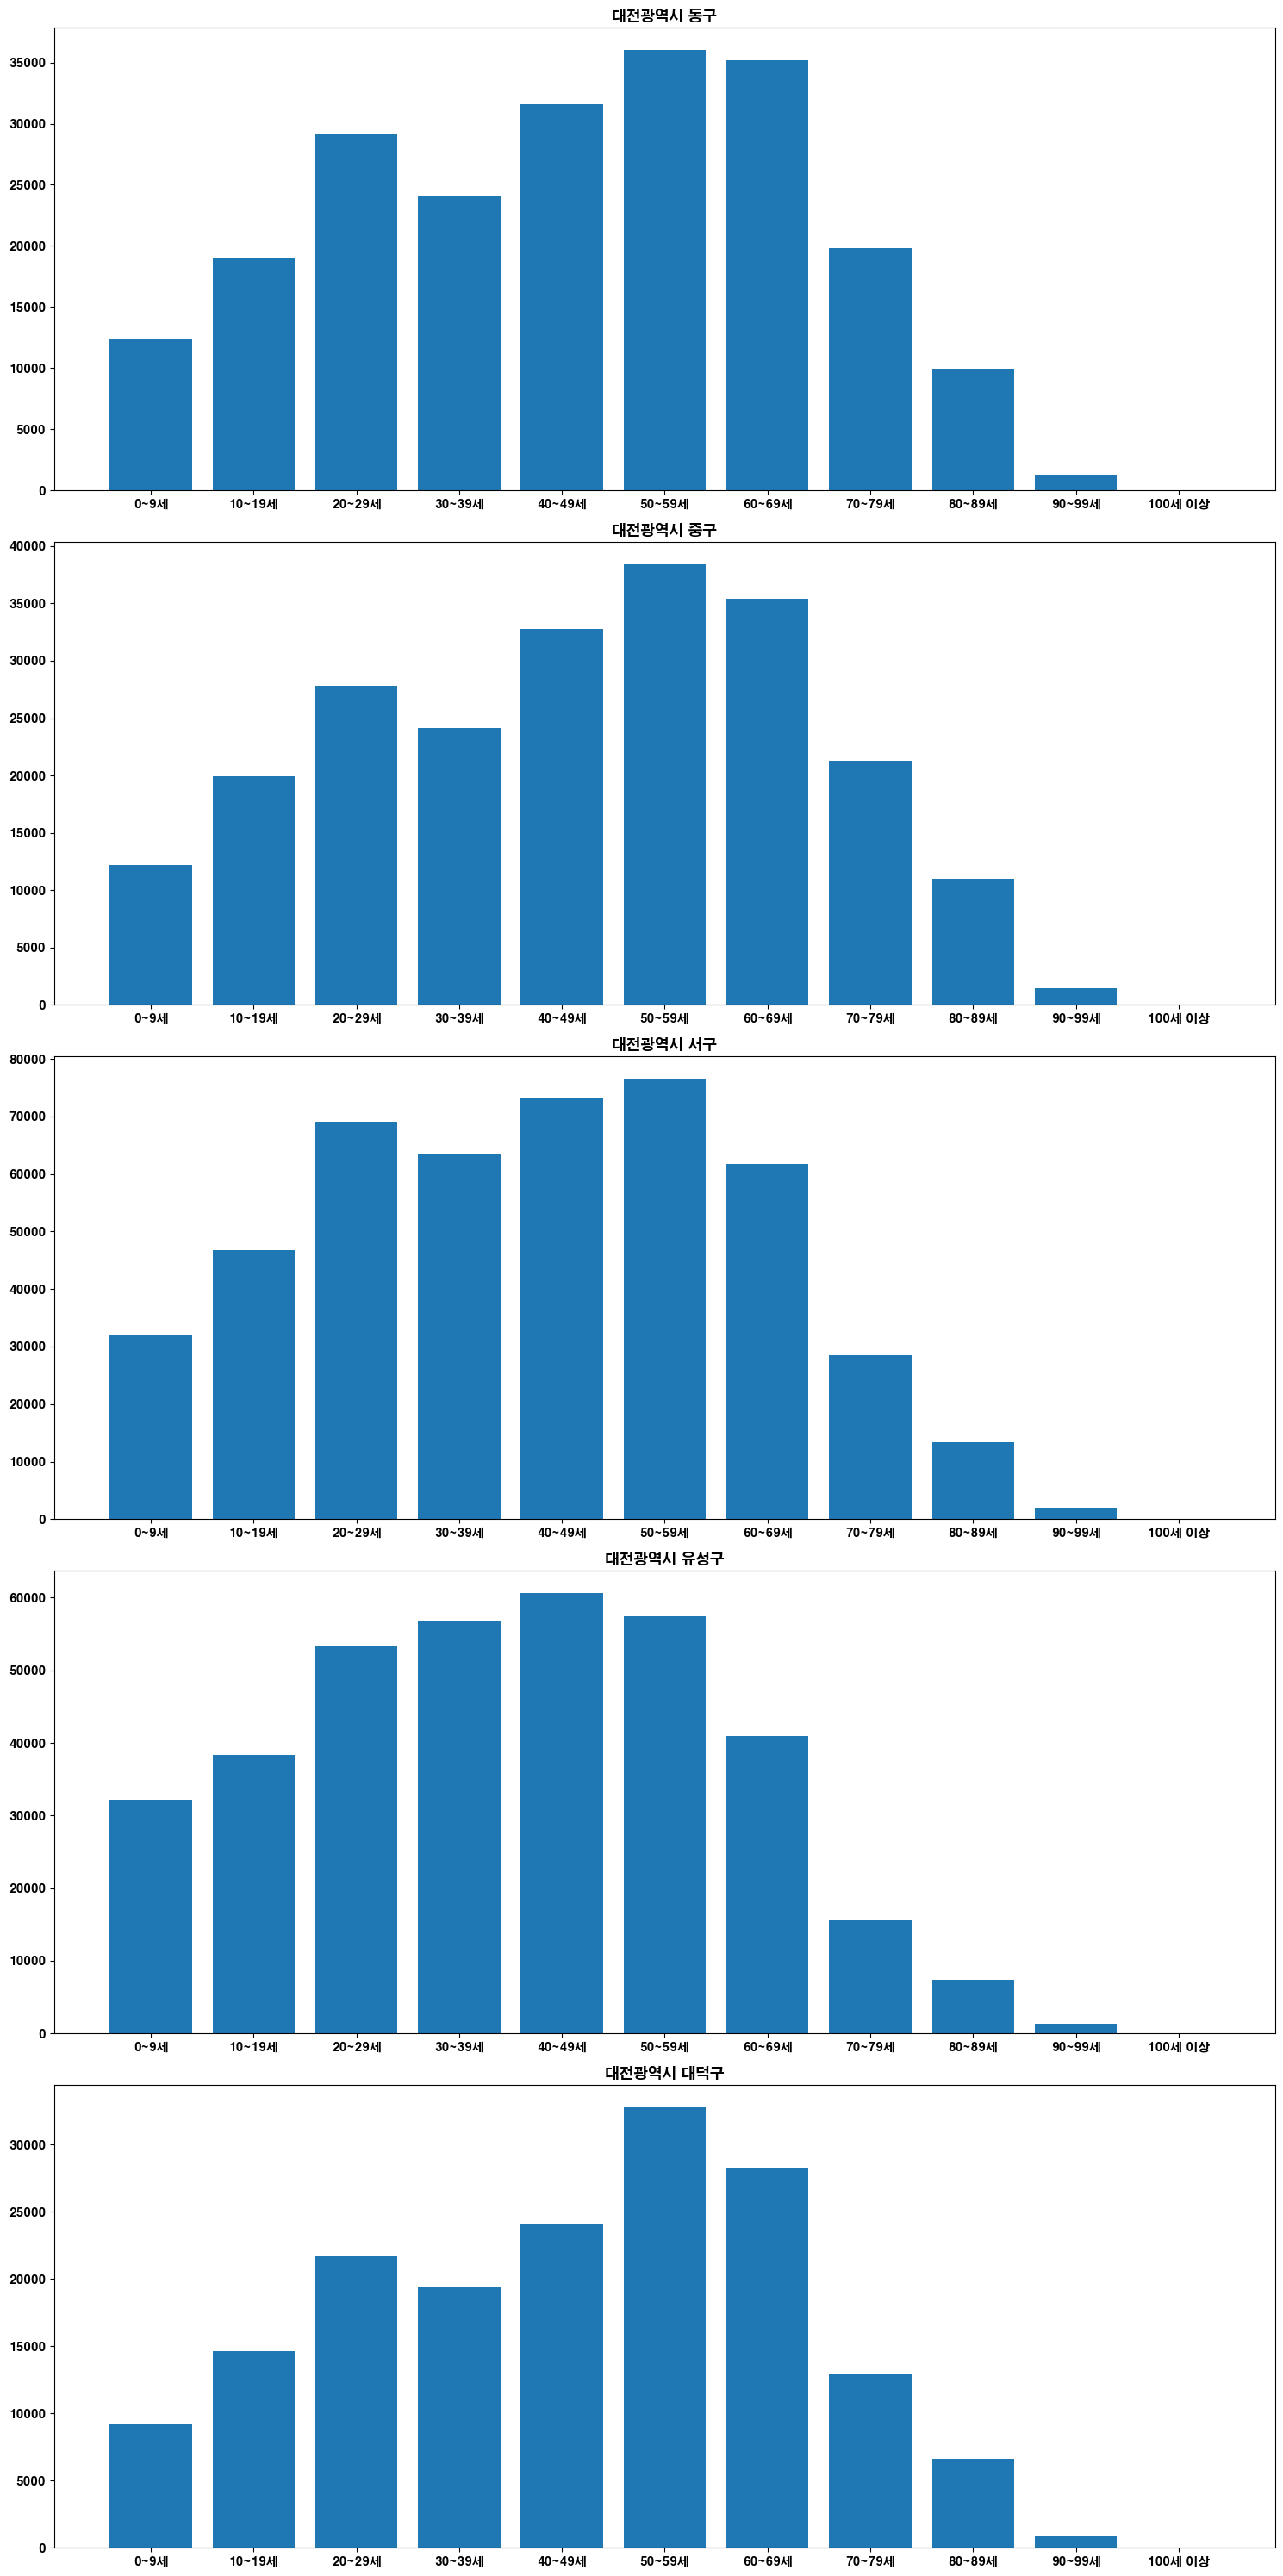

In [105]:
gu_T = deajeon_data_gu.T # .T함수로 행과 열을 교체
gu_T = gu_T.rename(columns=gu_T.iloc[0].str.split().str[1]) # 컬럼들의 이름을 각각의 구로 변경
# 필요없는 부분을 제거
gu_T = gu_T.drop(gu_T.index[0:3]) # 행정기관, 총 인구수, 연령구간인구수 제거
gu_T = gu_T.drop(gu_T.index[11:]) # 남,여 인구수 + 연령인구수 제거
gu_T

# 크기 지정 하기
fig = plt.figure(figsize=(15,30))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.9, wspace=0.2, hspace=0.5)

# 5줄로 지정
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

# 제목
# 연령대, 각구에 대한 인구수
ax1.title.set_text('대전광역시 동구')
ax1.bar(gu_T.index, gu_T['동구'])

ax2.title.set_text('대전광역시 중구')
ax2.bar(gu_T.index, gu_T['중구'])

ax3.title.set_text('대전광역시 서구')
ax3.bar(gu_T.index, gu_T['서구'])

ax4.title.set_text('대전광역시 유성구')
ax4.bar(gu_T.index, gu_T['유성구'])

ax5.title.set_text('대전광역시 대덕구')
ax5.bar(gu_T.index, gu_T['대덕구'])

# 출력
plt.tight_layout()
plt.show()
